# Práctica de TP, FP, TN, FN y Matriz de Confusión.

Se trabaja con el dataset "breast_cancer" de scikit-learn. Para más detalles se recomienda consultar el capítulo previo.

In [139]:
# Importaciones
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [140]:
# Asignamos a X e y los datos de entrada y las etiquetas
X, y = load_breast_cancer(return_X_y=True)

# Dividimos datos en datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [141]:
# Se instancia un modelo de Naive Bayes
modelo_nb = GaussianNB()

# Se entrena el modelo
modelo_nb.fit(X_train, y_train)

# Se hacen predicciones en el conjunto de datos de testeo
y_pred = modelo_nb.predict(X_test)

## Función para calcular TP, FP, TN y FN

Se crea una función que tome como entrada los valores verdaderos ($y_{true}$) y estimados ($y_{pred}$) de las salidas y que devuelva los valores de TP, FP, TN y FN.
Esta función será de utilidad para posteriores cálculos de métricas.

In [142]:
def TP_FP_TN_FN(y_true, y_pred):
    """
    True Positive, False Positive, True Negative y False Negative

    Indicadores de cuantas predicciones de clases positivas y negativas 
    son hechas correctamente e incorrectamente. Estas medidas son la base
    para definir otras herramientas o métricas útiles para clasificadores binarios.

    Parameters
    ----------
    y_true_ :   Array de tamaño (n_samples)
                Valores verdaderos de las salidas.

    y_pred_ :   Array de tamaño (n_samples)
                Valores estimados las salidas.

    Returns
    -------
    TP :    int, True Positive obtenido 

    FP :    int, False Positive obtenido   

    TN :    int, True Negative obtenido

    FN :    int, False Negative obtenido        
    """
    # Cantidad de instancias positivas clasificadas correctamente como positivas
    TP = np.sum( (y_true == y_pred)[y_true == 1] )

    # Cantidad de instancias negativas clasificadas incorrectamente como positivas
    FP = np.sum( (y_true != y_pred)[y_true == -1] )

    # Cantidad de instancias negativas clasificadas correctamente como negativas
    TN = np.sum( (y_true == y_pred)[y_true == -1] )

    # Cantidad de instancias positivas clasificadas incorrectamente como negativas
    FN = np.sum( (y_true != y_pred)[y_true == 1] )

    return TP, FP, TN, FN

In [143]:
# Convertimos los 0 a -1 para que sean compatible los vectores con la función definida
y_test[y_test==0] = -1
y_pred[y_pred==0] = -1

# Cálculo de Tp, FP, TN y FN con la función propia
TP, FP, TN, FN = TP_FP_TN_FN(y_test, y_pred)

# Cálculo de Tp, FP, TN y FN con función de scikit-learn
TN_sklearn, FP_sklearn, FN_sklearn, TP_sklearn = confusion_matrix(y_test, y_pred).ravel()

# Se comparan los resultados obtenidos con ambos métodos en un Data Frame de Pandas
df_TP_FP_TN_FN = pd.DataFrame(columns=['TP', 'FP', 'TN', 'FN'])
df_TP_FP_TN_FN.loc['Función Propia'] = [TP, FP, TN, FN]
df_TP_FP_TN_FN.loc['Función Scikit-learn'] = [TP_sklearn, FP_sklearn, TN_sklearn, FN_sklearn]
df_TP_FP_TN_FN

,TP,FP,TN,FN
Función Propia,101,6,57,7
Función Scikit-learn,101,6,57,7


## Función para obtener la Matriz de Confusión

Se crea una función que devuelva la matriz de confusión. Cómo se vio previamente, esta matriz está compuesta por los valores de TP, FP, TN y FN, entonces, se hace uso de la función previamente definida y luego se acomodan como corresponde cada valor para conformar la matriz de confusión.

In [144]:
def MatrizConfusion(y_true_, y_pred_, plotear=False):
    """
    Matriz de confusión de un clasificador binario.

    MatrizConfusion presenta de manera comprensible los True Positive (TP), 
    False Postive (FP), True Negative (TN) y False Negative (FN). Con esta
    se pueden hacer distintos tipos de comparaciones de los clasificadores binarios.

    Parameters
    ----------
    y_true_ :   Array de tamaño (n_samples)
                Valores verdaderos de las salidas.

    y_pred_ :   Array de tamaño (n_samples)
                Valores estimados las salidas.

    plotear:    Booleana, default=False
                Si es True, se grafica un mapa de calor con la matriz de confusión; 
                de otra manera, no se grafica la matriz de confusión.

    Returns
    -------
    Matriz_Confusion:   ndarray de tamaño (2, 2)
                        Matriz que contiene los valores de TP, FP, TN y FN con el orden:
                            [[TP, FN],
                             [FP, TN]].    
    """
    # Se obtienen los valores de TP, FP, TN y FN
    TP, FP, TN, FN = TP_FP_TN_FN(y_true_, y_pred_)

    # Se conforma la Matriz de Confusión
    Matriz_Confusion = np.array([[TP, FN],
                                 [FP, TN]])
    
    if plotear:
        # Se crea un heatmap usando Seaborn
        sns.heatmap(Matriz_Confusion, annot=True, fmt="d", cmap="Blues", xticklabels=[1, -1], yticklabels=[1, -1], cbar=True)
        
        plt.title("Matriz de Confusión")
        plt.xlabel("Predicho")
        plt.ylabel("Verdadero")

    return Matriz_Confusion

### Obtención de las matrices de confusión

In [145]:
# Se obtiene la matriz de confusión con la función propia
matriz_confusion = MatrizConfusion(y_test, y_pred)

# Se obtiene la matriz de confusión con función de scikit-learn
matriz_confusion_sklearn = confusion_matrix(y_test, y_pred)

print('Matriz de confusión generada con función propia:')
print(matriz_confusion)
print('\nMatriz de confusión generada con scikit-learn:')
print(matriz_confusion_sklearn)

Matriz de confusión generada con función propia:
[[101   7]
 [  6  57]]

Matriz de confusión generada con scikit-learn:
[[ 57   6]
 [  7 101]]


Se observa que los elementos en los dos resultados difieren. Graficando las matrices se podrá ver si hay un error o si están distribuidos de manera distinta.

### Gráficas de las matrices de confusión

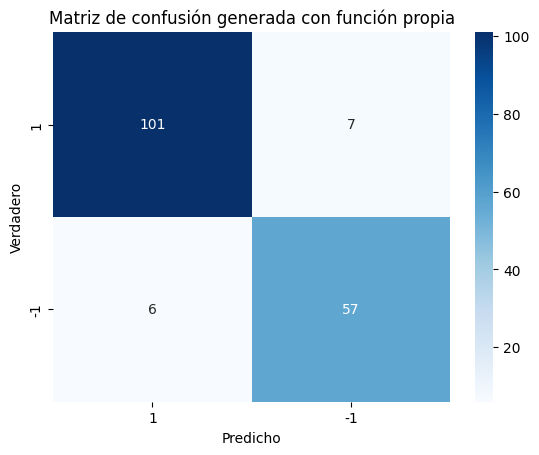

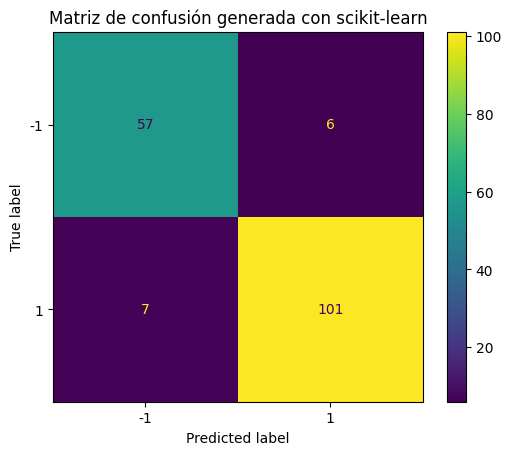

In [146]:
# Se grafica la matriz de confusión con la función propia
matriz_confusion = MatrizConfusion(y_test, y_pred, True)
plt.title('Matriz de confusión generada con función propia')

# Se grafica la matriz de confusión con función de scikit-learn
matriz_confusion_sklearn = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Matriz de confusión generada con scikit-learn')
plt.show()

Como se observa, la función de scikit-learn intercambió los lugares de las etiquetas de salida con respecto a la función propia que armamos. Ambos resultados son correctos, aun así, esto nos advierte de que si se utiliza una función de una determinada librería, es muy importante verificar en que formato se presentan los resultados para no cometer errores en la interpretación de los mismos.